*This code implements the GPV two-step N-specific estimation of both the CDF and PDF of the cost in a reverse auction procurement setting. To do so, it requires a dataset contained in the file "nlp.dat"*

*You need to install the libraries (use pip install or !pip install together with the required uninstalled package)*

### Libraries and setting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.interpolate as interp
import pandas as pd
from io import StringIO
from scipy.stats import gaussian_kde
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

In [3]:
pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

In [4]:
# for plots
plt.rcParams.update({"text.usetex": True, 'font.size': 14})
colors = plt. rcParams['axes.prop_cycle'].by_key()['color']

# ensure the notebook generate the same randomess
np.random.seed(2609)

### Defining pseudo CDF and pseudo PDF

In [5]:
def pseudo_cdf(pseudo_values):
    # Get the number of pseudo_values
    length_ps = pseudo_values.shape[0]
    
    # Initialize an array for the pseudo CDF
    pseudo_cdf_distr = np.zeros_like(pseudo_values)

    # Loop through each element in pseudo_values
    for r in range(length_ps):
        # Calculate the empirical CDF at the current element        
        pseudo_cdf_distr[r] = (1/(length_ps)) * (1+np.where(pseudo_values == pseudo_values[r])[0][0])


    return pseudo_cdf_distr


In [6]:
import numpy as np

def pseudo_pdf(pseudo_bids):
    # Sort pseudo_bids
    sorted_bids = np.sort(pseudo_bids)
    
    # Initialize arrays
    pseudo_pdf = np.zeros_like(pseudo_bids)
    triweightker = np.zeros_like(pseudo_bids)
    obj_triw = np.zeros_like(pseudo_bids)

    # Calculate delta
    delta = 2.978 * 1.06 * (np.var(pseudo_bids)**(1/2))**(-1/6)

    for r in range(len(pseudo_bids)):
        triweightker[:] = 0
        
        # Calculate obj_triw
        obj_triw[:] = (1/delta) * (sorted_bids - sorted_bids[r])
        
        # Calculate triweightker
        triweightker = np.where(np.abs(obj_triw) <= 1, (35/32)*(1-obj_triw**2)**3, 0)
        
        # Calculate striweightker
        striweightker = (1/delta) * np.sum(triweightker)
        
        # Calculate pseudo_pdf
        pseudo_pdf[r] = (1/len(pseudo_bids)) * striweightker

    return pseudo_pdf


### Importing and cleaning the dataset

In [7]:
file=r'C:\Users\User\Desktop\GPV\nlp.dat' #write down your path-file
df = pd.read_csv(file, delim_whitespace=True, header=None)
df.columns = ['t', 'N', 'W', 'Z']

df

,t,N,W,Z
0,1,3,2.2244,0.7190
1,2,3,2.0882,0.1201
2,3,3,2.3001,0.4096
3,4,3,6.7037,0.2798
4,5,3,3.1007,0.9756
5,6,3,3.6341,0.0664
6,7,3,2.2648,0.1506
7,8,3,2.8711,0.9912
8,9,3,4.6166,0.8134
9,10,3,2.3098,0.2711


**Variables are as follows**

$t:$ Auction identifier

$N_t:$ Number of bidders

$W_t:$ Winning bid 

$Z_t:$ Covariate

In [8]:
# Sorting values with respect to number of bidders
data = df[['N','W']]
data = data.sort_values(by='N')
data.head()

,N,W
0,3,2.2244
11,3,2.1571
10,3,2.9542
9,3,2.3098
7,3,2.8711


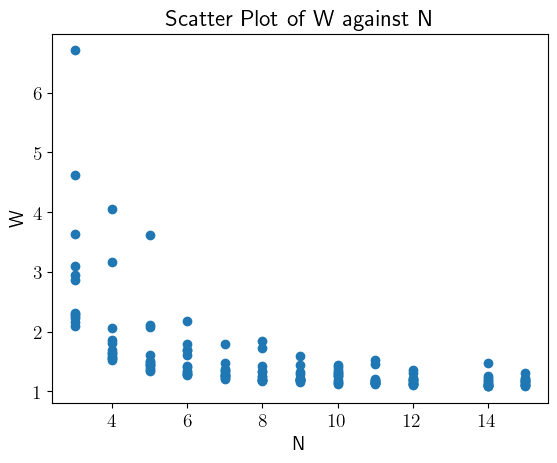

In [9]:
# Plotting (What is the relationship between the winning bid and the number of bidders?)
plt.scatter(data['N'], data['W'])
plt.xlabel('N')
plt.ylabel('W')
plt.title('Scatter Plot of W against N')
plt.show()

*As the number of bidders grows the winning bid tend to decrease*

In [10]:
#How many observations do we have per number of bidders?
data['N'].value_counts()

N
3     12
4     12
5     12
6     12
7     12
8     12
9     12
10    12
11    12
12    12
14    12
15    12
Name: count, dtype: int64

*12 observations for each N=3,4,...,15*

In [11]:
#Let's prepare the data for the GPV algorithm
N = data.to_numpy()[:, 0]
W = data.to_numpy()[:, 1]
Ns = np.unique(N) #Will be used in for loop

### GPV estimation

C:\Users\User\AppData\Local\Temp\ipykernel_9220\3735661724.py:30: RuntimeWarning: divide by zero encountered in power
  fc=(((1-Fz)**((1/i)-1))*fz)/i


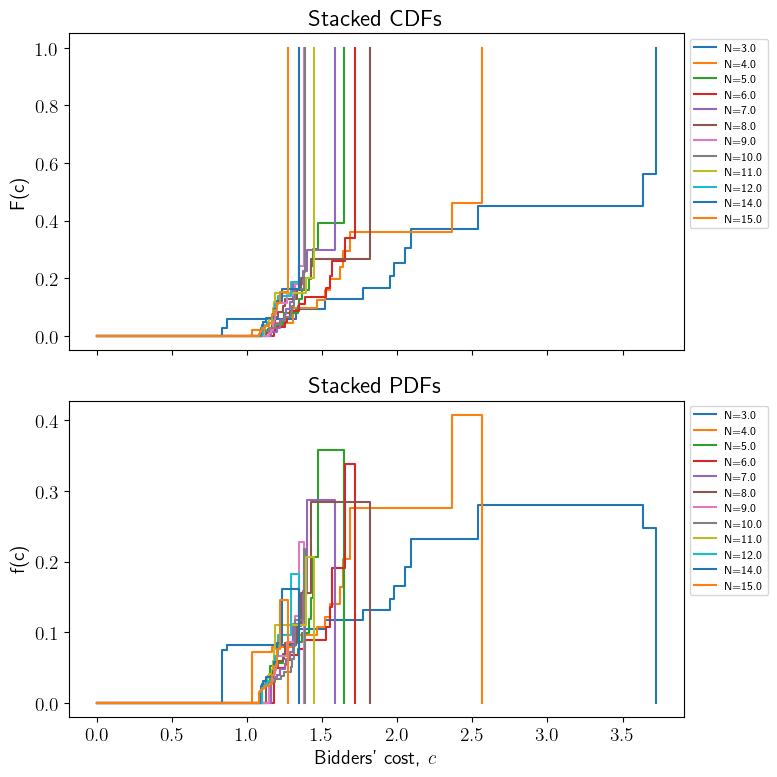

In [12]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)

for i in Ns:
    w = W[N == i]
    # Estimate empirical CDF and PDF of winning bids
    ecdf_w = ECDF(w)
    F1 = ecdf_w.y
    Fw = F1[1:]
    kde = gaussian_kde(w)
    fw = kde.evaluate(w) #Kernel density estimation
        
    # Estimate empirical CDF and PDF of bids
    #Fs=1-(1-Fw)**(1/i)
    #fs=(1/i)*fw*(1-Fw)**((1/i)-1)
    

    #Estimate the cost corresponding to the winning bid, I call it v_win. These are also known as Pseudo values.
    c_win=w - (((1/(i-1))* (1-Fw))/fw)

    #Estimate the pseudo CDF and pseudo PDF
    Fz=pseudo_cdf(c_win)
    ecdf_cw = ECDF(c_win)
    F1 = ecdf_cw.y
    Fz = F1[1:]
    fz=pseudo_pdf(c_win)
    
    #Estimate the CDF and PDF of cost
    Fc=1-(1-Fz)**(1/i)
    fc=(((1-Fz)**((1/i)-1))*fz)/i
    fc[-1]=0    
   
    # Plotting the stacked CDFs
    axes[0].plot(np.insert(np.sort(c_win), 0, 0), np.insert(Fc, 0, 0), label=f'N={i}', drawstyle='steps-post')

    # Plotting the stacked PDFs
    axes[1].plot(np.insert(np.sort(c_win), 0, 0), np.insert(fc, 0, 0), label=f'N={i}', drawstyle='steps-post')


# Set labels and legends for the first subplot
axes[0].set_ylabel("F(c)")
axes[0].set_title("Stacked CDFs")
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# Set labels and legends for the second subplot
axes[1].set_xlabel("Bidders' cost, $c$")
axes[1].set_ylabel("f(c)")
axes[1].set_title("Stacked PDFs")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()